In [27]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
%matplotlib inline
import seaborn as sns
import chardet


In [28]:
# Open the CSV file in binary mode and detect the encoding
with open("Superstore22.csv", "rb") as f:
    result = chardet.detect(f.read())

# Print the detected encoding
print("Detected encoding:", result["encoding"])

#Read the CSV file using the detected encoding
df = pd.read_csv("Superstore22.csv", encoding=result["encoding"])


Detected encoding: ISO-8859-1


In [29]:
df.head(5)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


In [30]:
df.shape

(51290, 26)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  int64  
 6   Market          51290 non-null  object 
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row.ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment         51290 non-null 

In [32]:
df.shape

(51290, 26)

In [33]:
df.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount            int64
Market             object
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [34]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [35]:
df[df.duplicated()]

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum


In [36]:
df.drop_duplicates()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0,US,00:00.0,CA-2014-109701,High,...,69,Corporate,00:00.0,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0,US,00:00.0,CA-2014-109701,High,...,9,Corporate,00:00.0,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0,US,00:00.0,CA-2014-106964,Medium,...,12,Home Office,00:00.0,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0,US,00:00.0,CA-2014-145219,Critical,...,90,Home Office,00:00.0,First Class,15.95,California,Binders,2014,North America,52


In [37]:
df.describe()

,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.081341,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.273361,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.000000,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,1.000000,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


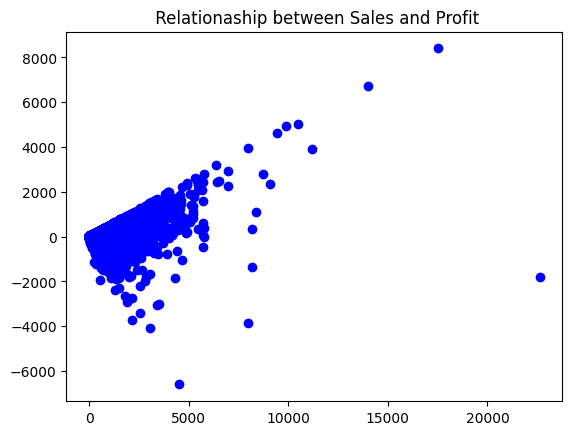

In [38]:
plt.scatter(df.Sales, df.Profit, c= 'blue')
xlabel= 'Sales'
ylabel= 'Profit'
plt.title(" Relationaship between Sales and Profit")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b67d41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b67d4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b67d73a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b67d4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b67d4ee0>],
 'means': []}

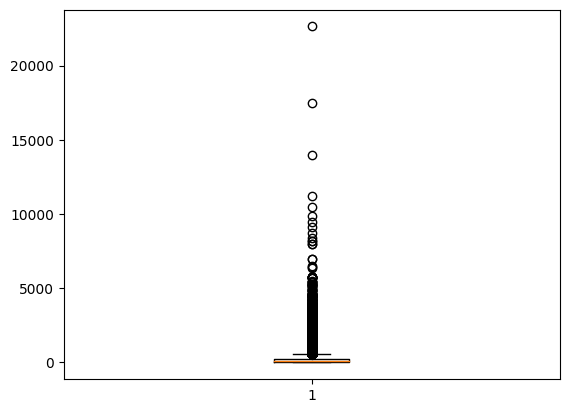

In [39]:
plt.boxplot(df.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6b7fa2bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6b7fa3130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6b7fa2950>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6b7fa3670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6b7fa38b0>],
 'means': []}

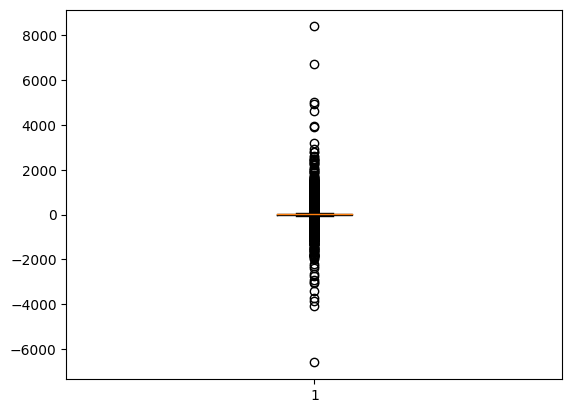

In [40]:
plt.boxplot(df.Profit)

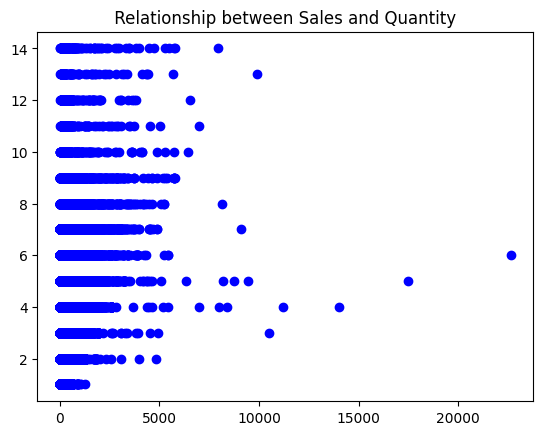

In [88]:
plt.scatter(df.Sales, df.Quantity, c= 'blue')
xlabel= 'Quantity'
ylabel= 'Sales'
plt.title(" Relationship between Sales and Quantity ")
plt.show()

In [42]:
#checking for normality for profit, sales, shipping cost
from scipy.stats import shapiro

In [43]:
col_names= ['Profit']
for col_names in col_names:
    data= df[col_names]

In [44]:
#performing shapiro-wilk test
stat,p= shapiro(data)
print(f'columns: {col_names}, statistics=%.3f, p=%.3f' % (stat, p))

    


columns: Profit, statistics=0.448, p=0.000


C:\Users\user1\AppData\Local\Temp\ipykernel_16004\4256497060.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51290.
  stat,p= shapiro(data)


In [89]:
alpha= 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('sample does not look normal(reject H0)')


sample does not look normal(reject H0)


In [46]:
col_names= ['Sales']
for col_names in col_names:
    data= df[col_names]

In [47]:
stat,p= shapiro(data)
print(f'columns: {col_names}, statistics=%.3f, p=%.3f' % (stat, p))


columns: Sales, statistics=0.467, p=0.000


C:\Users\user1\AppData\Local\Temp\ipykernel_16004\3963610172.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51290.
  stat,p= shapiro(data)


In [48]:
alpha= 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('sample does not look normal(reject H0)')


sample does not look normal(reject H0)


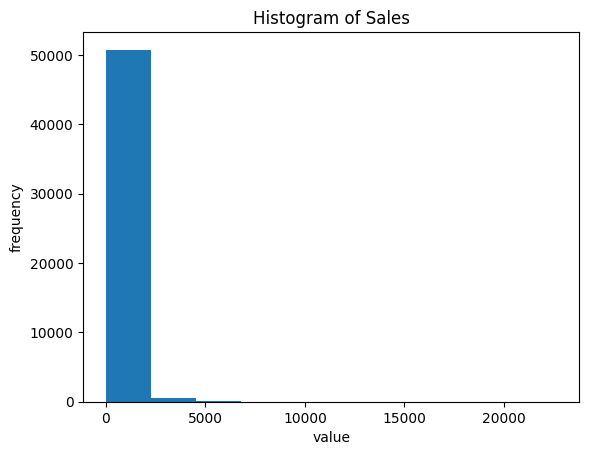

In [90]:
#Graphically checking of normality
plt.hist(df['Sales'], bins= 10)
plt.title('Histogram of Sales')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

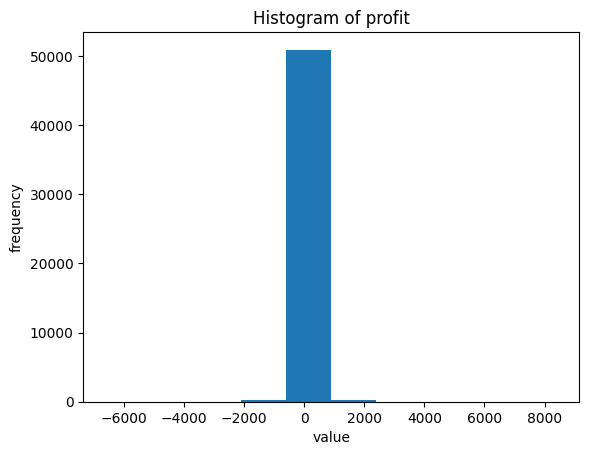

In [52]:
plt.hist(df['Profit'], bins= 10)
plt.title('Histogram of profit')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

(array([4.3981e+04, 4.0420e+03, 1.4010e+03, 7.0700e+02, 3.8200e+02,
        2.3300e+02, 1.6500e+02, 1.1100e+02, 6.3000e+01, 4.8000e+01,
        4.4000e+01, 2.7000e+01, 2.4000e+01, 1.6000e+01, 1.5000e+01,
        8.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([2.000000e-03, 4.668040e+01, 9.335880e+01, 1.400372e+02,
        1.867156e+02, 2.333940e+02, 2.800724e+02, 3.267508e+02,
        3.734292e+02, 4.201076e+02, 4.667860e+02, 5.134644e+02,
        5.601428e+02, 6.068212e+02, 6.534996e+02, 7.001780e+02,
        7.468564e+02, 7.935348e+02, 8.402132e+02, 8.868916e+02,
        9.335700e+02]),
 <BarContainer object of 20 artists>)

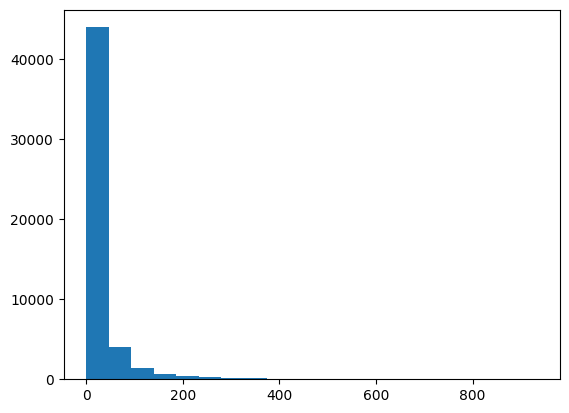

In [91]:
plt.hist(df['Shipping.Cost'], bins= 20)

In [94]:
Q1= df[['Sales']].quantile(0.25)
Q3= df[['Sales']].quantile(0.75)
IQR= Q3-Q1

In [55]:
upper_limit= Q3 + (1.5*IQR)
lower_limit = Q1 -(1.5*IQR)

In [56]:
upper_limit, lower_limit, IQR


(581.0, -299.0, 220.0)

In [57]:
# Trimming the data
df.loc[(df['Sales']> upper_limit)  | (df['Sales']< lower_limit)]




,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
196,Office Supplies,Los Angeles,United States,RS-197654,Roland Schwarz,0,US,00:00.0,CA-2011-106726,Critical,...,1261,Corporate,00:00.0,First Class,506.49,California,Storage,2011,North America,50
201,Office Supplies,Los Angeles,United States,DE-132554,Deanra Eno,0,US,00:00.0,CA-2012-142601,Medium,...,947,Home Office,00:00.0,Second Class,36.83,California,Storage,2012,North America,16
221,Office Supplies,Los Angeles,United States,PF-192254,Phillip Flathmann,0,US,00:00.0,CA-2013-114972,Critical,...,1101,Consumer,00:00.0,First Class,364.76,California,Appliances,2013,North America,45
226,Office Supplies,Los Angeles,United States,AI-108554,Arianne Irving,0,US,00:00.0,CA-2013-158694,High,...,721,Consumer,00:00.0,Second Class,105.59,California,Storage,2013,North America,46
231,Office Supplies,Los Angeles,United States,SC-207254,Steven Cartwright,0,US,00:00.0,CA-2014-108539,High,...,726,Consumer,00:00.0,Second Class,58.05,California,Storage,2014,North America,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51177,Technology,Los Angeles,United States,BT-115304,Bradley Talbott,0,US,00:00.0,CA-2014-117212,Medium,...,890,Home Office,00:00.0,Second Class,78.76,California,Phones,2014,North America,9
51185,Technology,Los Angeles,United States,FA-142304,Frank Atkinson,0,US,00:00.0,CA-2014-122364,Medium,...,859,Corporate,00:00.0,Standard Class,73.69,California,Phones,2014,North America,39
51256,Office Supplies,Los Angeles,United States,TG-213104,Toby Gnade,0,US,00:00.0,CA-2013-146633,Critical,...,1017,Consumer,00:00.0,Second Class,363.87,California,Binders,2013,North America,46
51271,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0,US,00:00.0,CA-2014-138149,High,...,896,Consumer,00:00.0,First Class,337.16,California,Binders,2014,North America,27


In [58]:
df1 =df.loc[(df['Sales']< upper_limit)  & (df['Sales'] >lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(df1))
print('outliers:', len(df)-len(df1))


before removing outliers: 51290
after removing outliers: 45626
outliers: 5664


<Axes: ylabel='Sales'>

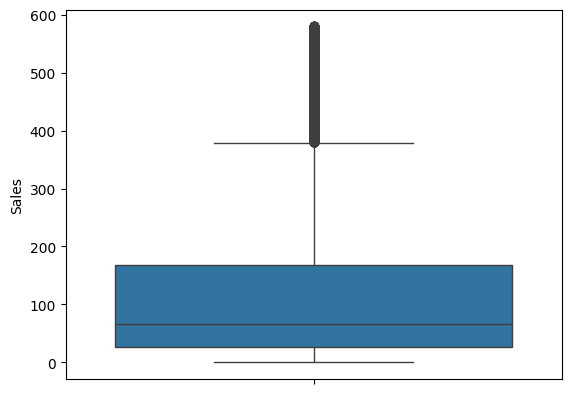

In [59]:
sns.boxplot(df1.Sales)

In [60]:
Q1= df1['Profit'].quantile(0.25)
Q3= df1['Profit'].quantile(0.75)
IQR= Q3-Q1

In [61]:
upper_limit= Q3 + (1.5*IQR)
lower_limit = Q1 -(1.5*IQR)

In [62]:
df1.loc[(df1['Profit']> upper_limit)  | (df1['Profit']< lower_limit)]

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
20,Office Supplies,Los Angeles,United States,DP-130004,Darren Powers,0,US,00:00.0,CA-2012-105347,Medium,...,369,Consumer,00:00.0,Standard Class,6.98,California,Paper,2012,North America,47
22,Office Supplies,Los Angeles,United States,KM-167204,Kunst Miller,0,US,00:00.0,CA-2012-135545,Medium,...,147,Consumer,00:00.0,Standard Class,4.93,California,Paper,2012,North America,47
35,Office Supplies,Los Angeles,United States,CL-125654,Clay Ludtke,0,US,00:00.0,CA-2013-134803,Low,...,183,Consumer,00:00.0,Standard Class,17.93,California,Paper,2013,North America,22
38,Office Supplies,Los Angeles,United States,MV-181904,Mike Vittorini,0,US,00:00.0,CA-2013-123512,Critical,...,220,Consumer,00:00.0,First Class,74.66,California,Paper,2013,North America,25
46,Office Supplies,Los Angeles,United States,XP-218654,Xylona Preis,0,US,00:00.0,CA-2013-109365,Medium,...,315,Consumer,00:00.0,Standard Class,22.15,California,Paper,2013,North America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51207,Office Supplies,Los Angeles,United States,MC-178454,Michael Chen,0,US,00:00.0,CA-2011-156594,High,...,488,Consumer,00:00.0,Second Class,51.65,California,Binders,2011,North America,52
51244,Office Supplies,Los Angeles,United States,DV-134654,Dianna Vittorini,0,US,00:00.0,CA-2013-126102,High,...,277,Consumer,00:00.0,Second Class,21.99,California,Binders,2013,North America,37
51258,Office Supplies,Los Angeles,United States,AP-107204,Anne Pryor,0,US,00:00.0,US-2013-103674,Medium,...,437,Home Office,00:00.0,Standard Class,39.51,California,Binders,2013,North America,49
51272,Office Supplies,Los Angeles,United States,CT-119954,Carol Triggs,0,US,00:00.0,CA-2014-137085,Medium,...,313,Consumer,00:00.0,Standard Class,14.47,California,Binders,2014,North America,27


In [63]:
df2 =df1.loc[(df1['Profit']< upper_limit)  & (df1['Profit'] >lower_limit)]
print('before removing outliers:', len(df1))
print('after removing outliers:', len(df2))
print('outliers:', len(df1)-len(df2))


before removing outliers: 45626
after removing outliers: 37694
outliers: 7932


<Axes: ylabel='Profit'>

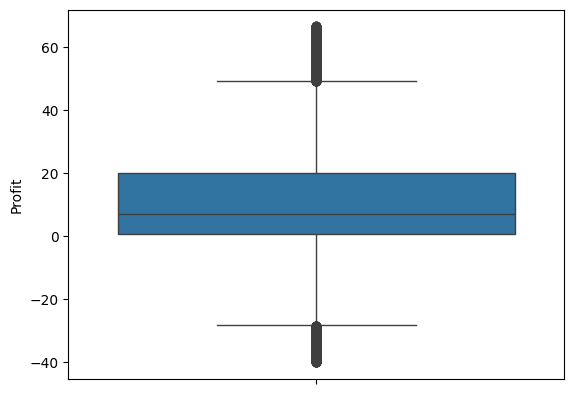

In [64]:
sns.boxplot(df2.Profit)

In [65]:
df2

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0,US,00:00.0,CA-2014-109701,High,...,69,Corporate,00:00.0,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0,US,00:00.0,CA-2014-109701,High,...,9,Corporate,00:00.0,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0,US,00:00.0,CA-2014-106964,Medium,...,12,Home Office,00:00.0,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0,US,00:00.0,CA-2014-145219,Critical,...,90,Home Office,00:00.0,First Class,15.95,California,Binders,2014,North America,52


In [66]:
col_names= ['Sales']
for col_names in col_names:
    data= df2[col_names]

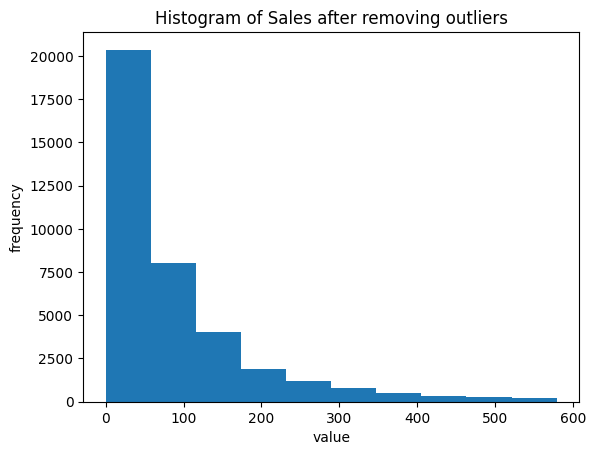

In [67]:
plt.hist(df2['Sales'], bins= 10)
plt.title('Histogram of Sales after removing outliers')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

                                         EDA

In [68]:
df2.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


In [95]:
df2.shape

(37694, 26)

In [96]:
df2['Sub.Category'].value_counts()

Sub.Category
Binders        5710
Art            4488
Storage        3646
Paper          3243
Furnishings    2681
Labels         2591
Fasteners      2394
Envelopes      2233
Supplies       2194
Accessories    2105
Chairs         1805
Phones         1660
Appliances      845
Bookcases       754
Machines        621
Copiers         587
Tables          137
Name: count, dtype: int64

In [69]:
df2.groupby('Sub.Category').min()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Year,Market2,weeknum
Sub.Category,,,,,,,,,,,,,,,,,,,,,
Accessories,Technology,Abadan,Afghanistan,AA-103151,Aaron Bergman,0,APAC,00:00.0,AG-2012-4910,Critical,...,10,1,Consumer,00:00.0,First Class,0.040,'Amman,2011,APAC,1
Appliances,Office Supplies,Aalst,Algeria,AA-103151,Aaron Hawkins,0,APAC,00:00.0,AG-2011-1070,Critical,...,61,0,Consumer,00:00.0,First Class,0.010,Adana,2011,APAC,1
Art,Office Supplies,Aachen,Afghanistan,AA-103152,Aaron Bergman,0,APAC,00:00.0,AG-2011-7230,Critical,...,5,1,Consumer,00:00.0,First Class,0.020,'Amman,2011,APAC,1
Binders,Office Supplies,Aachen,Afghanistan,AA-103151,Aaron Bergman,0,APAC,00:00.0,AE-2014-3830,Critical,...,4,1,Consumer,00:00.0,First Class,0.003,'Amman,2011,APAC,1
Bookcases,Furniture,Aba,Albania,AA-103152,Aaron Bergman,0,APAC,00:00.0,AG-2011-9060,Critical,...,3,35,Consumer,00:00.0,First Class,0.334,'Amman,2011,APAC,1
Chairs,Furniture,Aba,Afghanistan,AA-104803,Aaron Bergman,0,APAC,00:00.0,AG-2011-8930,Critical,...,13,14,Consumer,00:00.0,First Class,0.074,'Asir,2011,APAC,1
Copiers,Technology,Abidjan,Afghanistan,AA-104802,Aaron Bergman,0,APAC,00:00.0,AG-2011-4560,Critical,...,26,35,Consumer,00:00.0,First Class,0.190,'Amman,2011,APAC,1
Envelopes,Office Supplies,Aachen,Afghanistan,AA-104801,Aaron Bergman,0,APAC,00:00.0,AG-2011-3130,Critical,...,6,2,Consumer,00:00.0,First Class,0.010,'Amman,2011,APAC,1
Fasteners,Office Supplies,Aachen,Afghanistan,AA-103154,Aaron Bergman,0,APAC,00:00.0,AE-2013-1130,Critical,...,12,1,Consumer,00:00.0,First Class,0.010,'Asir,2011,APAC,1


Text(0, 0.5, 'Profit')

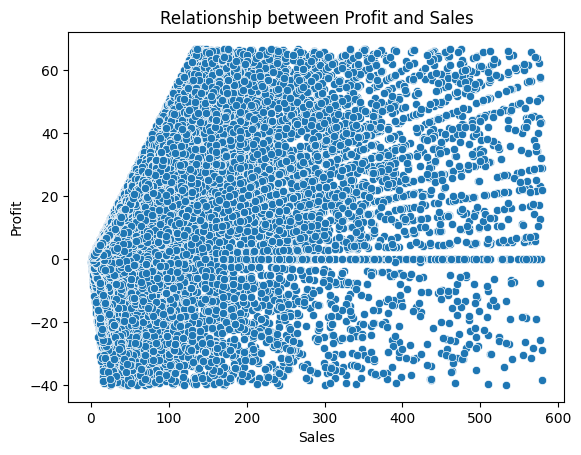

In [70]:
#checking the relationship between Sales and Profit after removing outliers
sns.scatterplot(x='Sales', y='Profit', data=df2)
plt.title('Relationship between Profit and Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')

<Figure size 1000x2000 with 0 Axes>

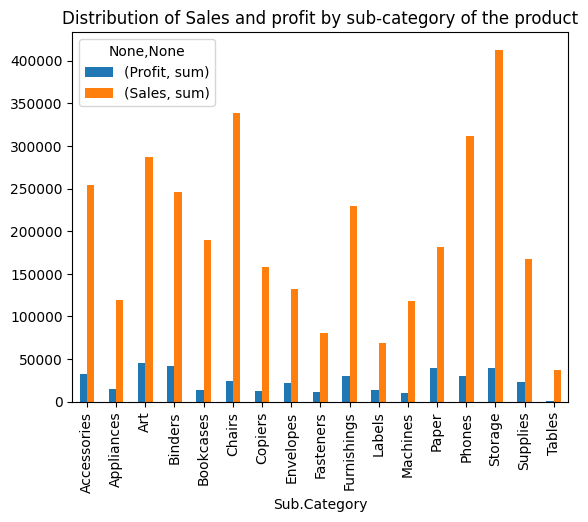

In [71]:
plt.figure(figsize= (10,20))
df2.groupby('Sub.Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Distribution of Sales and profit by sub-category of the product')
plt.show()

<Figure size 1000x2000 with 0 Axes>

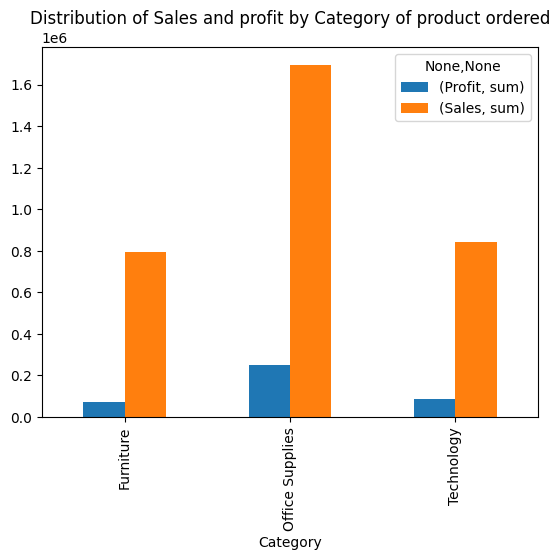

In [72]:
plt.figure(figsize= (10,20))
df2.groupby('Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Distribution of Sales and profit by Category of product ordered')
plt.show()

In [97]:
df2['Segment'].value_counts()

Segment
Consumer       19509
Corporate      11349
Home Office     6836
Name: count, dtype: int64

<Figure size 1000x2000 with 0 Axes>

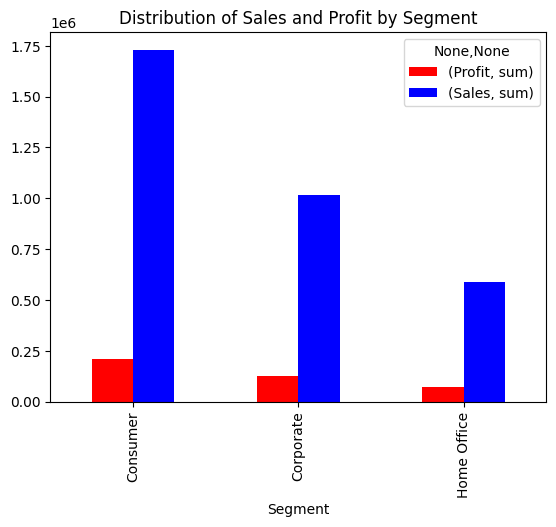

In [74]:
plt.figure(figsize= (10,20))
df2.groupby('Segment')[['Profit','Sales']].agg(['sum']).plot.bar(color= ["red", "blue"])
plt.title('Distribution of Sales and Profit by Segment')
plt.show()


<Axes: xlabel='Order.Priority'>

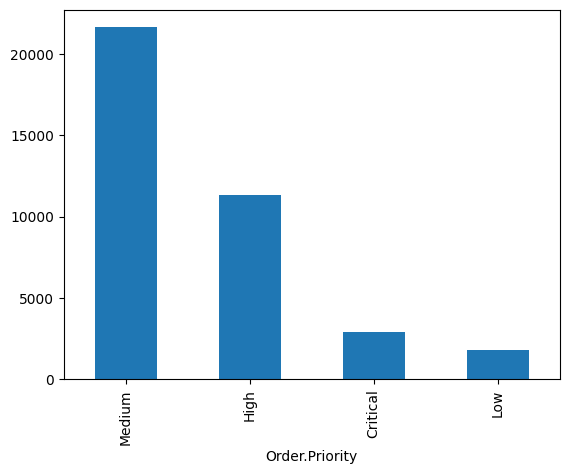

In [75]:
df2['Order.Priority'].value_counts().plot.bar()

<Figure size 1000x2000 with 0 Axes>

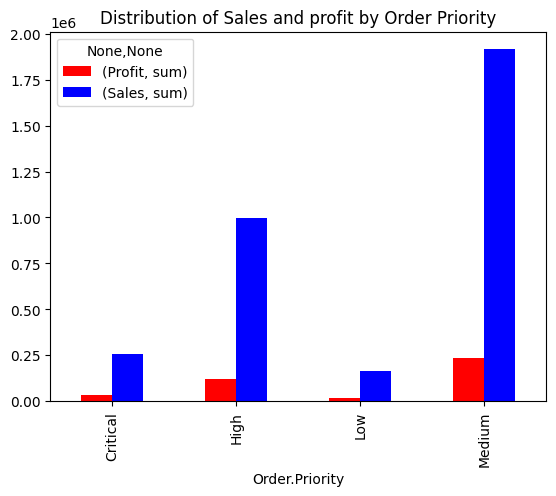

In [76]:
plt.figure(figsize= (10,20))
df2.groupby('Order.Priority')[['Profit','Sales']].agg(['sum']).plot.bar(color= ["red", "blue"])
plt.title('Distribution of Sales and profit by Order Priority')
plt.show()

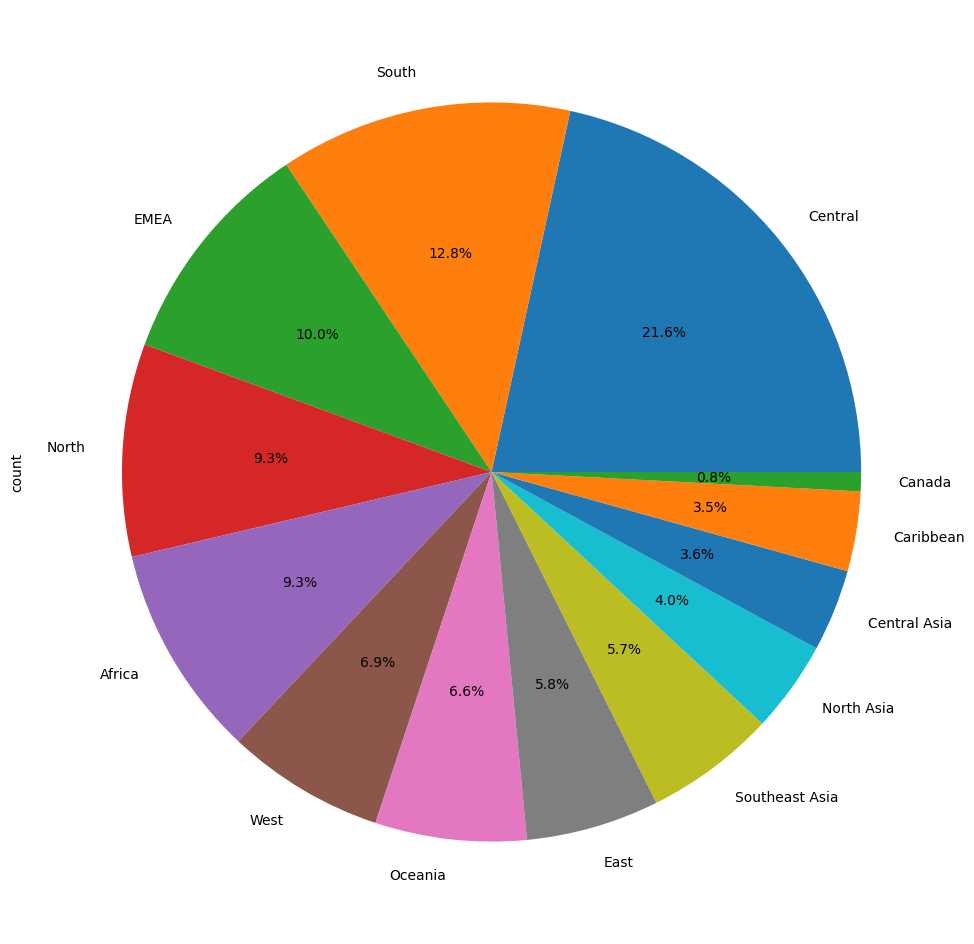

In [77]:
plt.figure(figsize=(16,12))
df2['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Figure size 3000x2000 with 0 Axes>

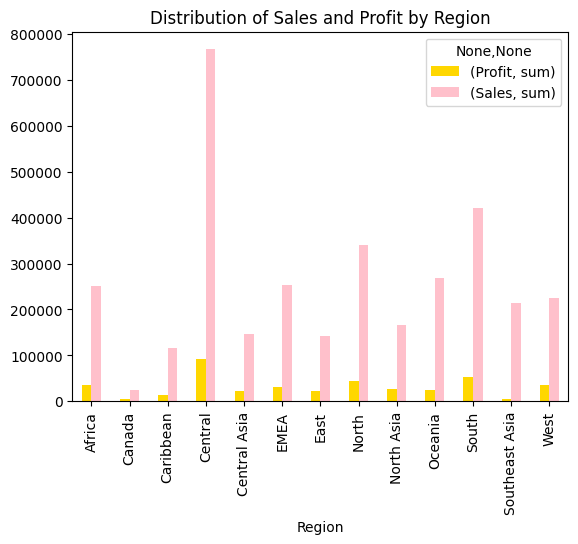

In [78]:
plt.figure(figsize= (30,20))
df2.groupby('Region')[['Profit','Sales']].agg(['sum']).plot.bar(color= ["gold", "pink"])
plt.title('Distribution of Sales and Profit by Region')
plt.show()

Text(0.5, 1.0, 'Distribution of Sales by Shipping Mode')

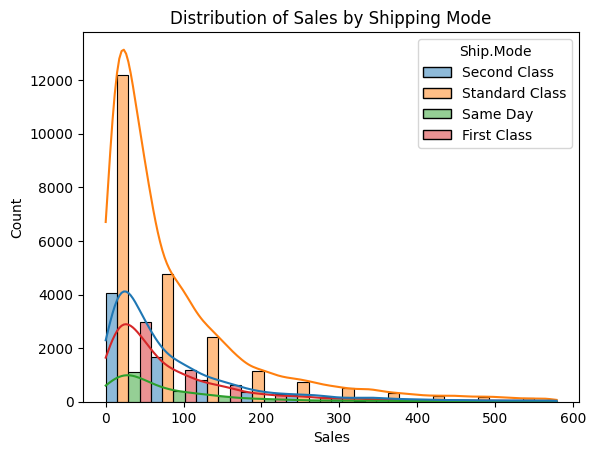

In [99]:
sns.histplot(x = 'Sales',  data= df2, bins=10, hue='Ship.Mode',  multiple='dodge', kde=True, )
plt.title('Distribution of Sales by Shipping Mode')

<function matplotlib.pyplot.show(close=None, block=None)>

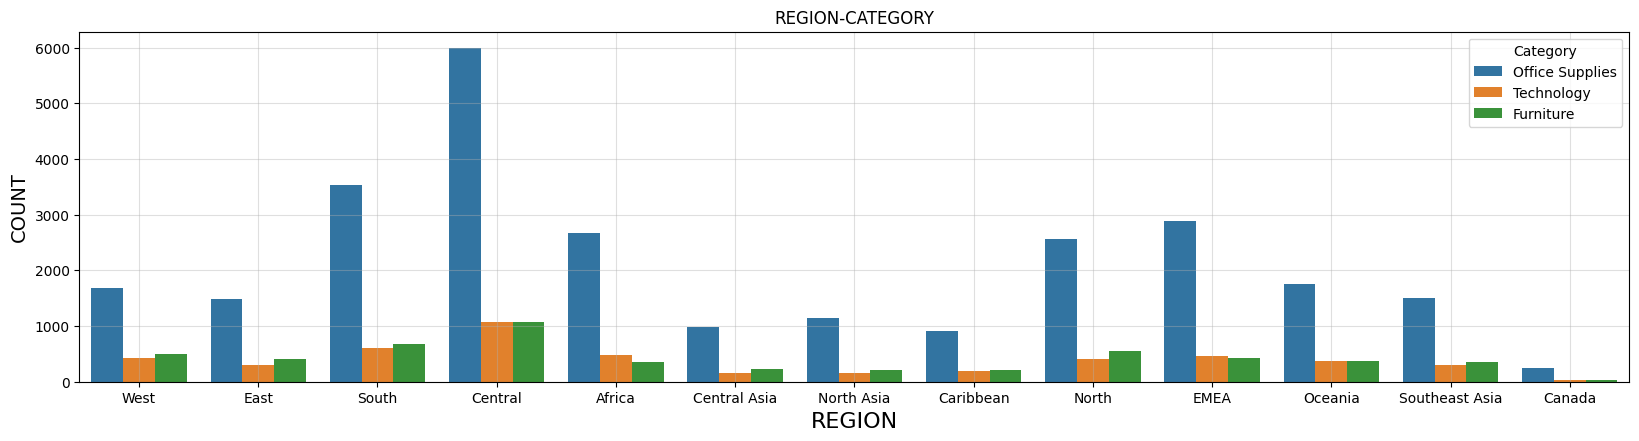

In [80]:
plt.figure(figsize=(20,10) )
plt.subplot(2,1,1)
sns.countplot(x= 'Region',hue='Category',data=df2)
plt.title('REGION-CATEGORY')
plt.xlabel('REGION',fontsize=16)
plt.ylabel('COUNT',fontsize=14)
plt.grid(alpha=0.4)
plt.show


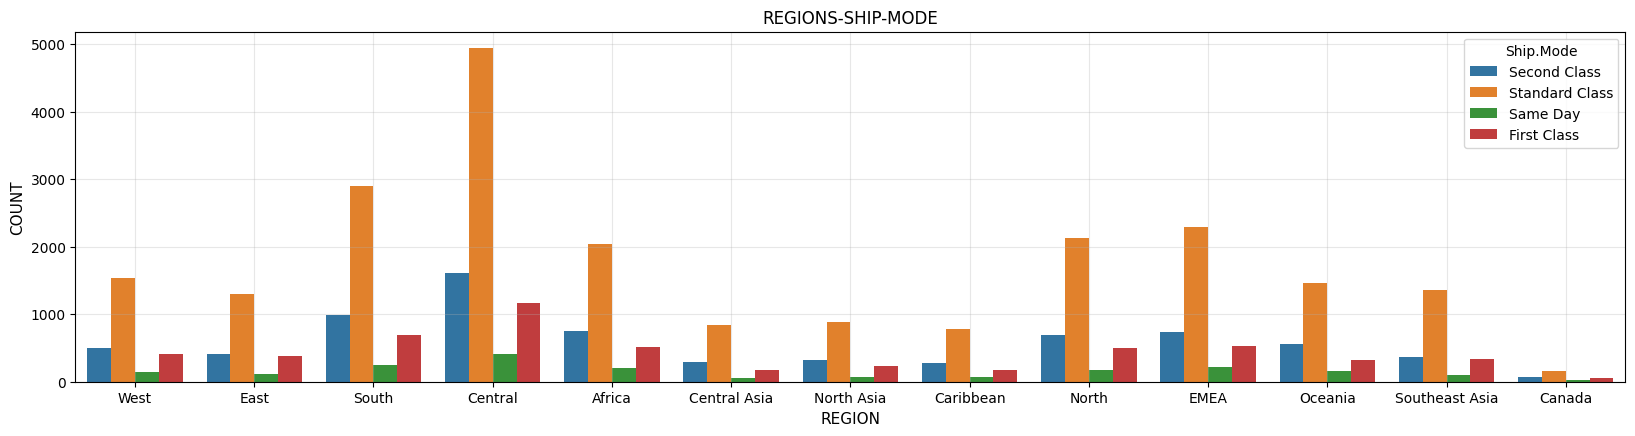

In [81]:
plt.figure(figsize=(20,10) )
plt.subplot(2,1,2)
sns.countplot(x='Region',hue='Ship.Mode',data=df2)
plt.title('REGIONS-SHIP-MODE')
plt.ylabel('COUNT',fontsize=11)
plt.xlabel('REGION',fontsize=11)
plt.grid(alpha=0.3)
plt.show()

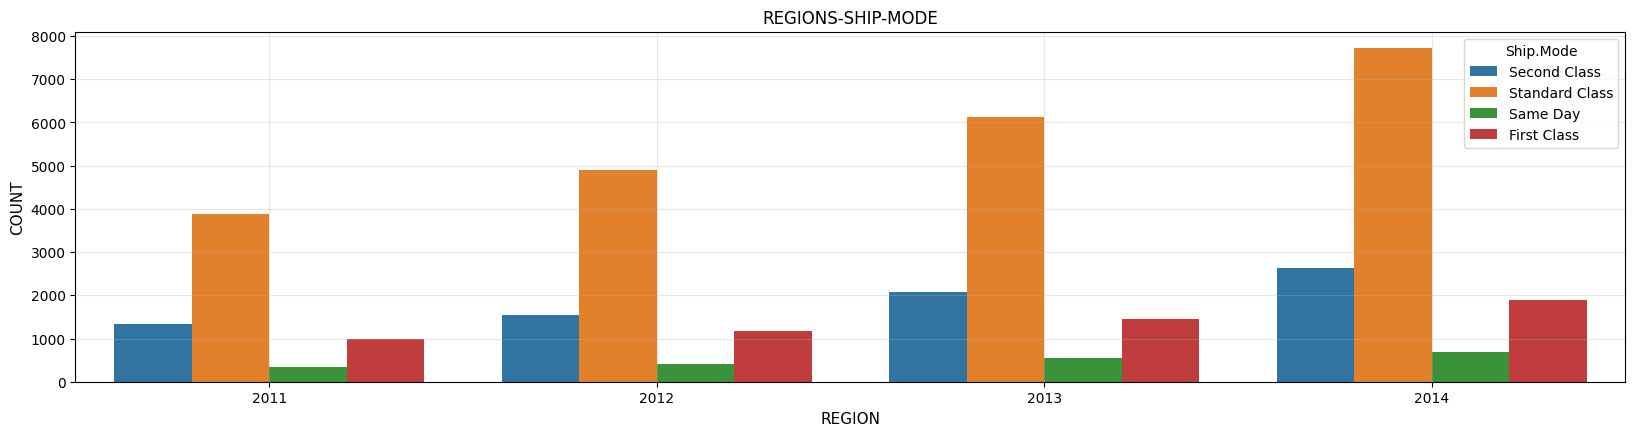

In [82]:
plt.figure(figsize=(20,10) )
plt.subplot(2,1,2)
sns.countplot(x='Year',hue='Ship.Mode',data=df2)
plt.title('REGIONS-SHIP-MODE')
plt.ylabel('COUNT',fontsize=11)
plt.xlabel('REGION',fontsize=11)
plt.grid(alpha=0.3)
plt.show()

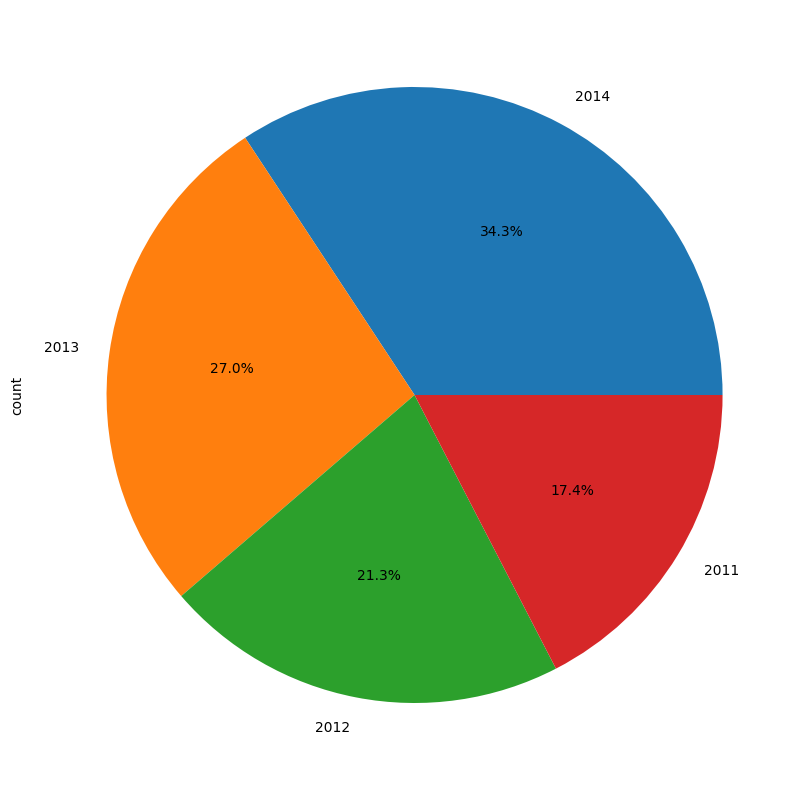

In [83]:
plt.figure(figsize=(10,10))
df2['Year'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Figure size 2000x1000 with 0 Axes>

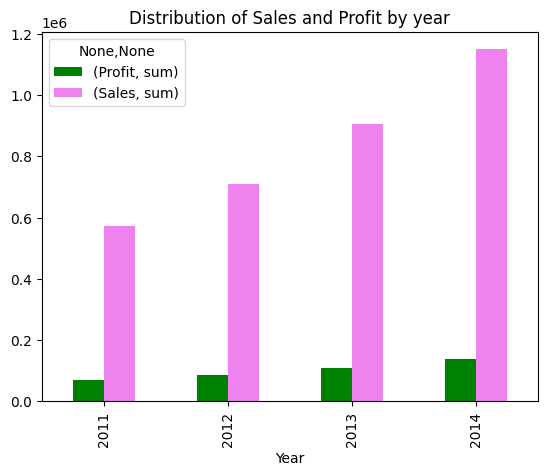

In [84]:
plt.figure(figsize= (20,10))
df2.groupby('Year')[['Profit','Sales']].agg(['sum']).plot.bar(color= ["green", "violet"])
plt.title('Distribution of Sales and Profit by year')
plt.show()

 Dropping  columns based on the domain knowledge from the dataset

In [85]:
df1.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


In [86]:
new_df= df1.drop(['Customer.ID','Customer.Name','Order.Date','Order.ID','Ship.Date','Product.ID','Row.ID','weeknum'],axis='columns')
new_df.head()

,Category,City,Country,Discount,Market,Order.Priority,Product.Name,Profit,Quantity,Region,Sales,Segment,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2
0,Office Supplies,Los Angeles,United States,0,US,High,Xerox 225,9.3312,3,West,19,Consumer,Second Class,4.37,California,Paper,2011,North America
1,Office Supplies,Los Angeles,United States,0,US,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,19,Consumer,Standard Class,0.94,California,Paper,2011,North America
2,Office Supplies,Los Angeles,United States,0,US,Medium,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,21,Consumer,Standard Class,1.81,California,Paper,2011,North America
3,Office Supplies,Los Angeles,United States,0,US,Medium,Xerox 1913,53.2608,2,West,111,Consumer,Standard Class,4.59,California,Paper,2011,North America
4,Office Supplies,Los Angeles,United States,0,US,High,Xerox 223,3.1104,1,West,6,Consumer,Standard Class,1.32,California,Paper,2011,North America


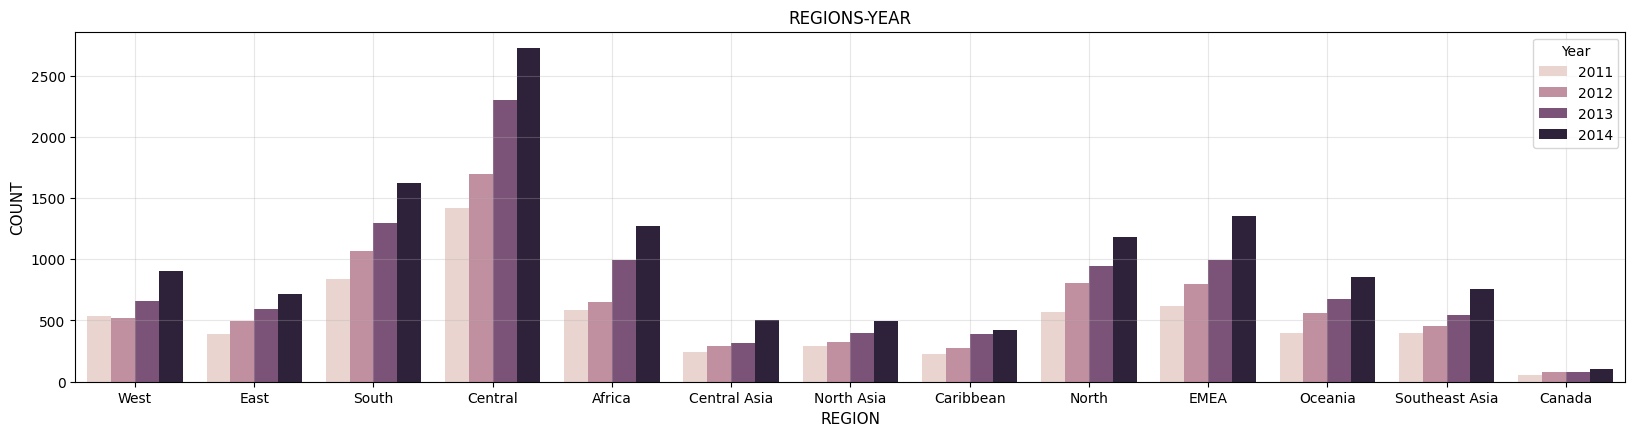

In [100]:
plt.figure(figsize=(20,10) )
plt.subplot(2,1,2)
sns.countplot(x='Region',hue='Year',data=df2)
plt.title('REGIONS-YEAR')
plt.ylabel('COUNT',fontsize=11)
plt.xlabel('REGION',fontsize=11)
plt.grid(alpha=0.3)
plt.show()

In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45626 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        45626 non-null  object 
 1   City            45626 non-null  object 
 2   Country         45626 non-null  object 
 3   Discount        45626 non-null  int64  
 4   Market          45626 non-null  object 
 5   Order.Priority  45626 non-null  object 
 6   Product.Name    45626 non-null  object 
 7   Profit          45626 non-null  float64
 8   Quantity        45626 non-null  int64  
 9   Region          45626 non-null  object 
 10  Sales           45626 non-null  int64  
 11  Segment         45626 non-null  object 
 12  Ship.Mode       45626 non-null  object 
 13  Shipping.Cost   45626 non-null  float64
 14  State           45626 non-null  object 
 15  Sub.Category    45626 non-null  object 
 16  Year            45626 non-null  int64  
 17  Market2         45626 non-null  obje